In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
%matplotlib inline
# plt.rcParams['figure.dpi'] = 800
# plt.rcParams['savefig.dpi'] = 900
plt.rcParams.update({'font.size': 1})

In [61]:

E_10 = pd.read_csv(f"../Files/ElectricField/EField10mm.txt", delimiter = ",")
E_20 = pd.read_csv(f"../Files/ElectricField/EField20mm.txt", delimiter = ",")
E_30 = pd.read_csv(f"../Files/ElectricField/EField30mm.txt", delimiter = ",")
display(E_30)


,y,E
0,0.000000,18835.297359
1,0.746327,18835.255017
2,0.804833,18835.262163
3,1.309448,18835.327806
4,2.627000,18834.920845
...,...,...
62,28.922443,19349.301206
63,29.249692,19403.096250
64,29.698038,19481.797667
65,29.788843,19497.231845


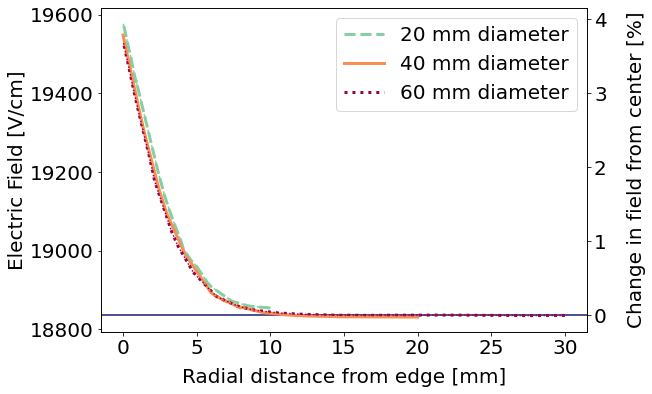

In [107]:
fig, ax1 = plt.subplots(figsize=(9,6))
fig.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9)  # Adjust the margins as needed

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

ax1.axhline(y = 18835.3, color = 'midnightblue')
ax1.plot(10 - E_10["y"], E_10["E"], label = "20 mm diameter", color=cmap(0.75), linewidth = 3, linestyle = "--")
ax1.plot(20 - E_20["y"], E_20["E"], label = "40 mm diameter", color=cmap(0.25), linewidth = 3)
ax1.plot(30 - E_30["y"], E_30["E"], label = "60 mm diameter", color=cmap(0), linewidth = 3, linestyle = ":")


E_10["E_percent"] = -100 + (E_10["E"] * 100 / 18835.3) 
E_20["E_percent"] = -100 + (E_20["E"] * 100 / 18835.3) 
E_30["E_percent"] = -100 + (E_30["E"] * 100 / 18835.3) 
ax2 = ax1.twinx()
ax2.plot(10 - E_10["y"], E_10["E_percent"], color=cmap(0.75), linestyle = "--")
ax2.plot(20 - E_20["y"], E_20["E_percent"], color=cmap(0.25))
ax2.plot(30 - E_30["y"], E_30["E_percent"], color=cmap(0), linestyle = ":")
ax2.set_ylabel('Change in field from center [%]', fontsize=20, labelpad=20)

ax1.tick_params(axis='both', labelsize=20)  # Adjust the tick label font size as needed
ax2.tick_params(axis='both', labelsize=20)  # Adjust the tick label font size as needed

# ax1.set_xlim(-4, 35)
ax1.legend(loc= "upper right",fontsize=20)
ax1.set_xlabel("Radial distance from edge [mm]", fontsize=20, labelpad=10)
ax1.set_ylabel("Electric Field [V/cm]", fontsize=20)
# ax1.figure.tight_layout()
fig.savefig("../Plots/RadialField.pdf")


In [63]:
# Load in the electric fields vs z position
Ez_align = pd.read_csv(f"../Files/ElectricField/Central_EField_Aligned.txt", delimiter = ",")
Ez_shift = pd.read_csv(f"../Files/ElectricField/Central_EField_Shifted.txt", delimiter = ",")
Ez_rotated = pd.read_csv(f"../Files/ElectricField/Central_EField_Rotated.txt", delimiter = ",")
Ez_disk = pd.read_csv(f"../Files/ElectricField/Central_EField_Disk.txt", delimiter = ",")

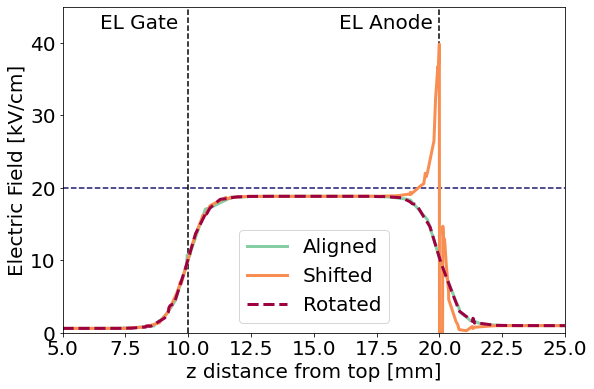

In [64]:
plt.figure(figsize=(9,6))

plt.axhline(y = 20, color = 'midnightblue', linestyle = '--')
plt.axvline(x = 10, color = 'k', linestyle = '--')
plt.axvline(x = 20, color = 'k', linestyle = '--')
plt.plot(Ez_align["z"], Ez_align["E"]/1e3, label = "Aligned", color=cmap(0.75), linewidth = 3)
plt.plot(Ez_shift["z"], Ez_shift["E"]/1e3, label = "Shifted", color=cmap(0.25), linewidth = 3)
# plt.plot(Ez_disk["z"], Ez_disk["E"], label = "Disk")
plt.plot(Ez_rotated["z"], Ez_rotated["E"]/1e3, label = "Rotated",linestyle = '--', color=cmap(0), linewidth = 3)
plt.text(6.5, 42, 'EL Gate', fontsize=20, color='black')
plt.text(16, 42, 'EL Anode', fontsize=20, color='black')
plt.legend(fontsize=20)
plt.xlim(5, 25)
plt.ylim(0, 45)
plt.xlabel("z distance from top [mm]", fontsize=20)
plt.ylabel("Electric Field [kV/cm]", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='both', labelsize=20) 

plt.savefig("../Plots/Zfield.pdf",facecolor='w', transparent=False)

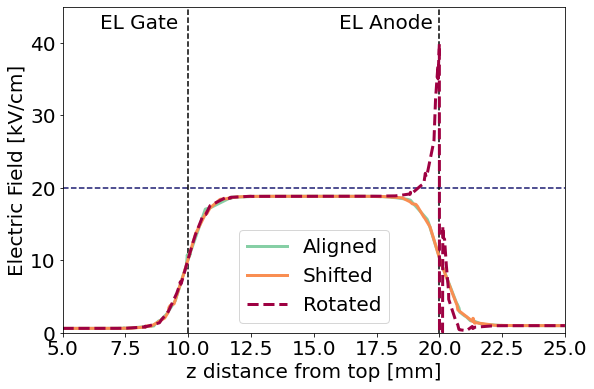

In [65]:
plt.figure(figsize=(9,6))

plt.axhline(y = 20, color = 'midnightblue', linestyle = '--')
plt.axvline(x = 10, color = 'k', linestyle = '--')
plt.axvline(x = 20, color = 'k', linestyle = '--')
plt.plot(Ez_align["z"], Ez_align["E"]/1e3, label = "Aligned", color=cmap(0.75), linewidth = 3)

# plt.plot(Ez_disk["z"], Ez_disk["E"], label = "Disk")
plt.plot(Ez_rotated["z"], Ez_rotated["E"]/1e3, label = "Shifted", color=cmap(0.25), linewidth = 3)
plt.plot(Ez_shift["z"], Ez_shift["E"]/1e3, label = "Rotated",linestyle = '--', color=cmap(0), linewidth = 3)
plt.text(6.5, 42, 'EL Gate', fontsize=20, color='black')
plt.text(16, 42, 'EL Anode', fontsize=20, color='black')
plt.legend(fontsize=20)
plt.xlim(5, 25)
plt.ylim(0, 45)
plt.xlabel("z distance from top [mm]", fontsize=20)
plt.ylabel("Electric Field [kV/cm]", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='both', labelsize=20) 
plt.savefig("../Plots/Zfield2.pdf",facecolor='w', transparent=False)

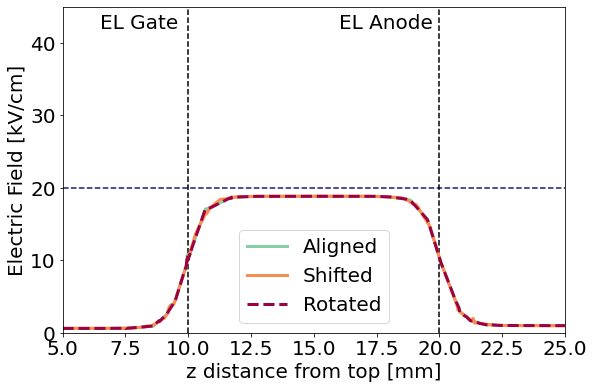

In [66]:
plt.figure(figsize=(9,6))

plt.axhline(y = 20, color = 'midnightblue', linestyle = '--')
plt.axvline(x = 10, color = 'k', linestyle = '--')
plt.axvline(x = 20, color = 'k', linestyle = '--')
plt.plot(Ez_align["z"], Ez_align["E"]/1e3, label = "Aligned", color=cmap(0.75), linewidth = 3)

# plt.plot(Ez_disk["z"], Ez_disk["E"], label = "Disk")
plt.plot(Ez_rotated["z"], Ez_rotated["E"]/1e3, label = "Shifted", color=cmap(0.25), linewidth = 3)
plt.plot(Ez_align["z"], Ez_align["E"]/1e3, label = "Rotated", linestyle = '--', color=cmap(0), linewidth = 3)
plt.text(6.5, 42, 'EL Gate', fontsize=20, color='black')
plt.text(16, 42, 'EL Anode', fontsize=20, color='black')
plt.legend(fontsize=20)
plt.xlim(5, 25)
plt.ylim(0, 45)
plt.xlabel("z distance from top [mm]", fontsize=20)
plt.ylabel("Electric Field [kV/cm]", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='both', labelsize=20) 
plt.savefig("../Plots/Zfield3.pdf",facecolor='w', transparent=False)

,z,E
0,0.000000,623.595245
1,0.008290,623.598304
2,0.028539,623.605777
3,0.036224,623.608614
4,0.057984,623.616645
...,...,...
517,24.944096,1031.742523
518,24.964214,1031.743268
519,24.984768,1031.741910
520,24.991797,1031.743263


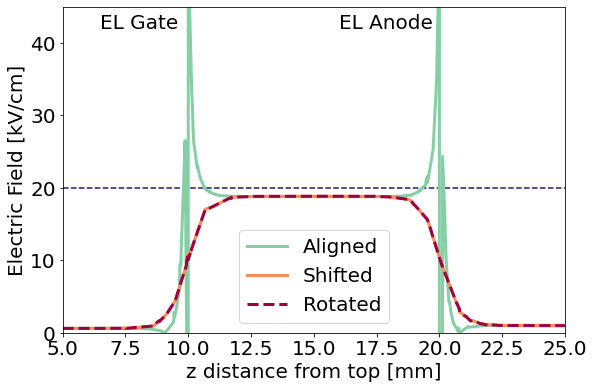

In [67]:
plt.figure(figsize=(9,6))

# Load in the electric fields vs z position
Ez_align2 = pd.read_csv(f"../Files/ElectricField/Central_EField_Aligned2.txt", delimiter = ",")

display(Ez_align2)

plt.axhline(y = 20, color = 'midnightblue', linestyle = '--')
plt.axvline(x = 10, color = 'k', linestyle = '--')
plt.axvline(x = 20, color = 'k', linestyle = '--')
plt.plot(Ez_align2["z"], Ez_align2["E"]/1e3, label = "Aligned", color=cmap(0.75), linewidth = 3)

# plt.plot(Ez_disk["z"], Ez_disk["E"], label = "Disk")
plt.plot(Ez_align["z"], Ez_align["E"]/1e3, label = "Shifted", color=cmap(0.25), linewidth = 3)
plt.plot(Ez_align["z"], Ez_align["E"]/1e3, label = "Rotated",linestyle = '--', color=cmap(0), linewidth = 3)
plt.text(6.5, 42, 'EL Gate', fontsize=20, color='black')
plt.text(16, 42, 'EL Anode', fontsize=20, color='black')
plt.legend(fontsize=20)
plt.xlim(5, 25)
plt.ylim(0, 45)
plt.xlabel("z distance from top [mm]", fontsize=20)
plt.ylabel("Electric Field [kV/cm]", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='both', labelsize=20) 
plt.savefig("../Plots/Zfield4.pdf",facecolor='w', transparent=False)